## Calculate descriptive statistics

In [1]:
import pandas as pd


df = pd.read_csv('WS3.csv', header = 0)
print(df.describe())
print(df.info())
print(df.head())

         q.frg.pt     be.pt.m      s4_new
count  650.000000  650.000000  650.000000
mean     0.015852   13.269431   38.810000
std      0.085470    5.457965   18.219814
min     -0.099000   -5.770000   -4.700000
25%     -0.034000   10.270000   28.625000
50%     -0.006040   13.915000   36.450000
75%      0.053000   17.000000   47.900000
max      0.889000   28.240000  137.400000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   q.frg.pt  650 non-null    float64
 1   be.pt.m   650 non-null    float64
 2   s4_new    650 non-null    float64
dtypes: float64(3)
memory usage: 15.4 KB
None
   q.frg.pt  be.pt.m  s4_new
0    -0.014      8.8    66.9
1    -0.061     12.9    39.4
2    -0.065     17.1    39.0
3    -0.063     16.6    39.2
4    -0.056     14.4    28.4


## Calculate z-scores

In [3]:
cols = ["q.frg.pt", "be.pt.m", "s4_new"]
for col in cols:
    df[f"z_{col}"] = (df[col] - df[col].mean()) / df[col].std()

df.head()
df.describe()

,q.frg.pt,be.pt.m,s4_new,z_q.frg.pt,z_be.pt.m,z_s4_new
count,650.000000,650.000000,650.000000,6.500000e+02,6.500000e+02,6.500000e+02
mean,0.015852,13.269431,38.810000,1.639714e-17,-3.935314e-16,-4.372571e-17
std,0.085470,5.457965,18.219814,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.099000,-5.770000,-4.700000,-1.343770e+00,-3.488375e+00,-2.388059e+00
25%,-0.034000,10.270000,28.625000,-5.832677e-01,-5.495511e-01,-5.590068e-01
50%,-0.006040,13.915000,36.450000,-2.561349e-01,1.182802e-01,-1.295293e-01
75%,0.053000,17.000000,47.900000,4.346348e-01,6.835091e-01,4.989074e-01
max,0.889000,28.240000,137.400000,1.021586e+01,2.742885e+00,5.411142e+00


## Plotted z-scores as histogram

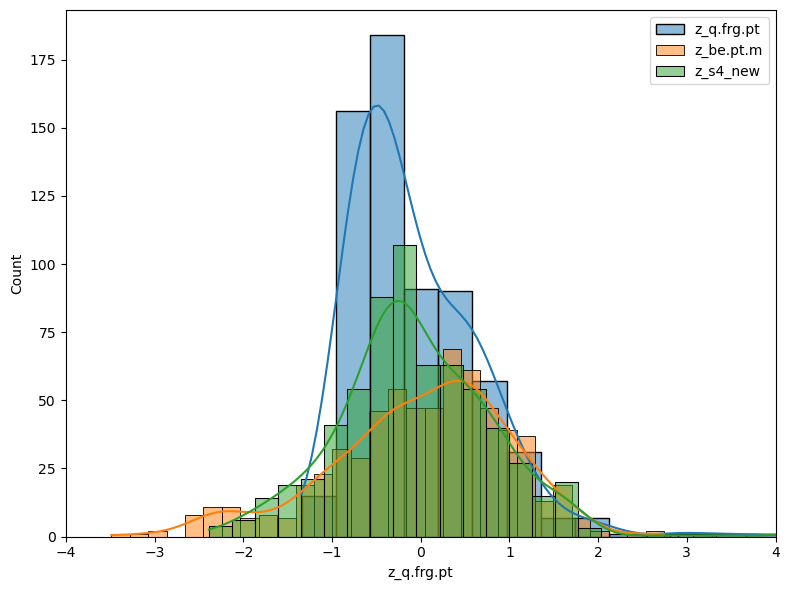

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)
sns.histplot(df["z_q.frg.pt"], bins=30, kde=True, ax=ax, label='z_q.frg.pt')
sns.histplot(df["z_be.pt.m"], bins=30, kde=True, ax=ax, label='z_be.pt.m')
sns.histplot(df["z_s4_new"], bins=30, kde=True, ax=ax, label='z_s4_new')
ax.set_xlim(-4, 4)
ax.legend()
fig.tight_layout()

## Bootstrap

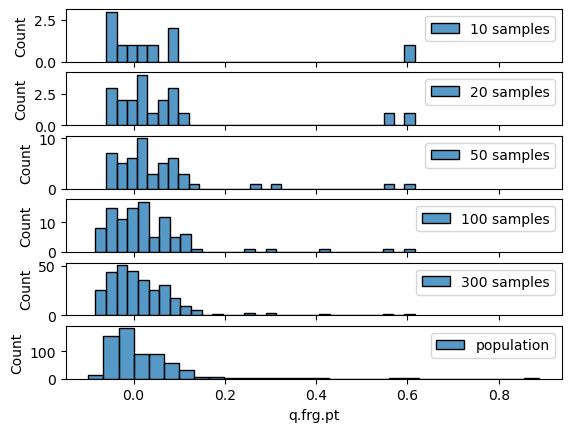

In [ ]:
from sklearn.utils import resample



var = df["q.frg.pt"]
num_samples = [10,20,50,100,300]
seed = 42

fig, axs = plt.subplots(len(num_samples)+1, 1, sharex=True)
i = 0
for num in num_samples:
    sample = resample(var, n_samples=num, random_state = seed)
    sns.histplot(sample, label = f"{num} samples", ax = axs[i], bins = 30)
    axs[i].legend()
    i += 1
sns.histplot(var, label = "population", ax = axs[-1], bins = 30)
axs[-1].legend()

